In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier


In [2]:

# Custom Single Layer Perceptron Implementation
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def _sigmoid_function(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iterations):
            for i in range(n_samples):
                z = np.dot(X[i], self.weights) + self.bias
                y_pred_prob = self._sigmoid_function(z)
                error = y[i] - y_pred_prob
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
        return self

    def predict(self, X, threshold: float = 0.5):
        z = np.dot(X, self.weights) + self.bias
        y_pred_proba = self._sigmoid_function(z)
        y_pred = np.where(y_pred_proba >= threshold, 1, 0)
        return y_pred


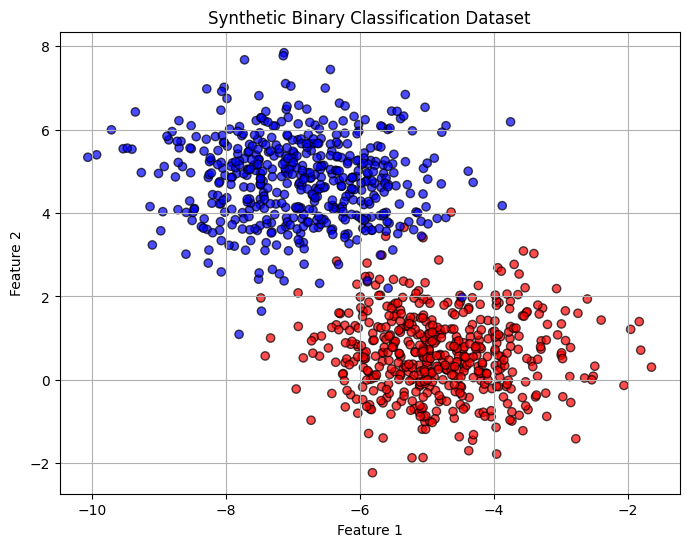

In [3]:

# Create synthetic binary classification dataset
X, y = make_blobs(n_features=2, centers=2, n_samples=1000, random_state=12)


# Generate synthetic dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=12)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)
plt.title("Synthetic Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()



In [4]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:

# Train custom SLP model
model = Perceptron(learning_rate=0.1, n_iterations=1000)
model.fit(X_train, y_train)


In [6]:

# Evaluate custom model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
acc_train = np.mean(y_pred_train == y_train)
acc_test = np.mean(y_pred_test == y_test)

print(f"Custom Perceptron\nAccuracy (Train): {acc_train:.3f} \nAccuracy (Test): {acc_test:.3f}")


Custom Perceptron
Accuracy (Train): 0.985 
Accuracy (Test): 0.995


In [7]:

# Comparison using sklearn MLPClassifier (SLP)
perceptron_mlp = MLPClassifier(
    hidden_layer_sizes=(),         # Single-layer perceptron
    activation='logistic',         # Sigmoid function
    solver='sgd',                  # Stochastic Gradient Descent
    max_iter=1000,
    random_state=42,
    learning_rate='constant',
    learning_rate_init=0.01
).fit(X_train, y_train)


In [8]:

# Evaluate sklearn model
y_pred_train_mlp = perceptron_mlp.predict(X_train)
y_pred_test_mlp = perceptron_mlp.predict(X_test)
acc_train_mlp = np.mean(y_pred_train_mlp == y_train)
acc_test_mlp = np.mean(y_pred_test_mlp == y_test)

print(f"MLPClassifier\nAccuracy (Train): {acc_train_mlp:.3f} \nAccuracy (Test): {acc_test_mlp:.3f}")

MLPClassifier
Accuracy (Train): 0.973 
Accuracy (Test): 0.980
